<br><br>
$$\Large\textbf{Predicción de matriculas efectivas en Universia}$$
$$\text{Autor : Mauricio Figueroa Colarte}$$
$$\text{E-mail : maur.figueroac@profesor.duoc.cl}$$
$$\text{Curso : Machine Learning - Universidad de Chile}$$
<br>
$\large\textbf{1	CONTEXTO}$

En este proyecto se requiere apoyar la toma de decisiones proactiva de los Directivos de $\textbf{Universia}$ (nombre ficticio) generando información predictiva  respecto de matriculas efectivas, utilizando datos de los postulantes proporcionados por el DEMRE (Departamento de Evaluación, Medición y Registro Educacional) durante el proceso de admisión del año en curso.

$\normalsize\textbf{1.1	Beneficios}$

Se busca predecir la matrícula efectiva más probable para determinar acciones que permitan cubrir, al menos, las vacantes ofrecidas. En particular, potenciar la matrícula efectiva de carreras potentes como Medicina con 200 postulaciones el último año y Enfermería teniendo en promedio los últimos 3 años sobre 260 postulaciones. Por otra parte, el mayor porcentaje de matriculados sobre postulaciones lo determina la carrera de Pedagogía en Ciencias con Mención en Biología, Física y Química, con un $82\%$, y la emergente carrera de Auditoría con un incremento considerable de los matriculados junto con Sociología.

$\normalsize\textbf{1.2	Hipótesis}$

Las matrículas efectivas se pueden pronosticar con una precisión y sensibilidad de al menos un $80\%$ mediante un modelo predictivo basado aprendizaje automático ($\textit{Machine Learning}$), implementado con algún algoritmo de clasificación supervisado, lo que eventualmente permitirá a los directivos tomar acciones proactivas, y posteriormente definir las acciones adecuadas en los procesos de Admisión. En el contexto de la hipótesis, la variable objetivo que indica la predicción de la matrícula, se caracteriza por ser dicotómica y categórica con valores “Matrícula (1)” y “No Matrícula (0)”.<br>
<br>
$\large\textbf{2	COMPRENSIÓN DE LOS DATOS}$

$\normalsize\textbf{2.1	 Acerca de la fuente de datos}$

La fuente de datos es un archivo Excel que recopila registros de postulaciones y matriculas efectivas para los períodos
2017, 2018 y 2019, con información consolidada desde el DEMRE  quien aporta información de las postulaciones, datos demográficos, geográficos, académicos, preferencias, becas y gratuidad. Por parte de la Universidad complementó con una planilla Excel con la información de matrículas efectivas, vacantes ofrecidas por carrera y facultad. 

El conjunto de datos tiene 16 características denominadas como: IDPOS, PERIODO, SEXO, PREFERENCIA, CARRERA, MATRICULADO, FACULTAD, PUNTAJE, GRUPO_DEPEN, REGION, LATITUD, LONGITUD, PTJE_NEM, PSU_PROMLM, PACE, GRATUIDAD, que se comprenderán más en detalle al momento de realizar la exploración de los datos.

La fuente de datos a utilizar como base para el proyecto, presenta 16551 registros de postulaciones, de los cuales 3286 corresponden a matriculas efectivas (ESTADO=”SI”) y 13365 no matriculados (ESTADO=”NO”) 

$\normalsize\textbf{2.2	Variable Objetivo}$

La variable de supervisión o variable objetivo será el campo denominado MATRICULADO que se identifica en la fuente de datos con sus valores posibles “SI” y “NO”. Posteriormente a la depuración de datos explicada más adelante pasará a llamarse ESTADO con valores 1 y 0.

$\normalsize\textbf{2.3	Diccionario de Datos}$

La siguiente tabla muestra el diccionario de datos para un mejor entendimiento de cada una de las variables 
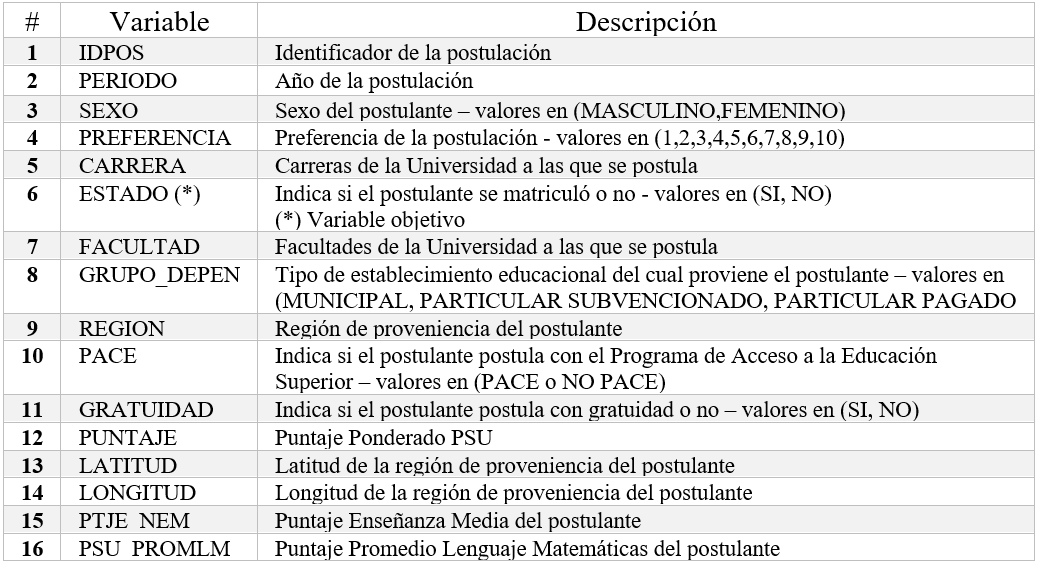<br>
$$\text{Tabla 1 : Diccionario de Datos} $$

$\large\textbf{3 EXPLORACIÓN DE LOS DATOS}$

En esta sección se muestra la caracterización de las variables para analizar la calidad y tomar decisiones respecto de su limpieza y transformación

$\small\textbf{NOTA}$ : Para no hacer tan extenso el documento, se obviaron detalles de programación y se presentarán las estadísticas y gráficas directamente para dar énfasis en el análisis

In [1]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import pandas as pd
from sklearn import datasets
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### DEFINICIÓN DE FUNCIONES ####
#Usando el método del codo para encontrar el número óptimo de grupos
def metodo_codo(valores):
    from sklearn.cluster import KMeans
    X = valores
    wcss = []
    for i in range(1,11):
        km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=11)
        km.fit(X)
        wcss.append(km.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title('Método del codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.show()

In [3]:
##Ajustando K-means al dataset con k=4
from sklearn.cluster import KMeans
def run_kmeans(X,k):
    km=KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_means = km.fit_predict(X)
    #visualizar clusters para k=4
    plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100, c='orange',label='Cluster 0', linewidths=1, edgecolors='brown')
    plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100, c='limegreen',label='Cluster 1',linewidths=1, edgecolors='k')
    plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100, c='deepskyblue',label='Cluster 2',linewidths=1, edgecolors='navy')
    plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100, c='indianred',label='Cluster 3',linewidths=1, edgecolors='darkred')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='*', c='red', alpha=0.7, label='Centroides', linewidths=1, edgecolors='darkred')
    plt.title('Matriculas Carreras')
    plt.xlabel('Matriculados')
    plt.ylabel('Postulantes')
    plt.legend()
    plt.show()
    return y_means

In [4]:
########## IMPORTAR LA DATA ##########
data = pd.read_excel("postulaciones.xlsx")

$\normalsize\textbf{3.1	Caracterización de variables}$

<img src="resumen_variables.png" width="900px">

$$\text{Tabla 2 : Estadísticas generales del dataset} $$

<table valign = "top">
    <tr>
        <td bgcolor="#ffffff"><img src="warning_pace.png" width="450px"><br> 
        </td>
        <td bgcolor="#ffffff"><img src="var_estado.png" width="450px"><br>
    </tr>
    <tr>
        <td>$$\text{Imagen 1 : Alerta sobre datos perdidos variable PACE} $$
        </td>
        <td>$$\text{Imagen 2 : Variable ESTADO (objetivo)} $$</td>
    </tr>
</table>

En la figura 1 se observa que la variable PACE viene con datos nulos (missing values), sin embargo, haciendo las averiguaciones con el dueño del proceso, se identificó como una situación normal, dado que el valor PACE corresponde a los casos en que el postulante tiene asignado ese beneficio, y las celdas en blanco corresponde cuando el postulante no tiene la beca, por lo que, para efectos de la depuración de datos , se decidió completarlos con el valor "NO PACE".

En la figura 2 se observa que la variable objetivo ESTADO es categórica, no tiene valores faltantes, e identifica con el valor "SI" cuando el postulante se matriculó en alguna carrera y "NO" cuando no se matriculó. Además, se observa que las clases se encuentran desbalanceadas, es decir la clase positiva "SI" es la minoritaria y la clase negativa "NO" es la mayoritaria. Dado lo anterior, en la fase de modelado, se deberá evaluar la aplicación del balanceo de clases al momento de entrenar los algoritmos de clasificación.

<table>
    <tr>
        <td bgcolor="#ffffff"><img src="periodo.png" width="450px"></td>
        <td bgcolor="#ffffff"><img src="sexo.png" width="450px"></td>
    </tr>
    <tr>
        <td>$$\text{Imagen 3 : Variable Periodo}$$</td>
        <td>$$\text{Imagen 4 : Variable Sexo}$$</td>
    </tr>
</table>

En la figura 3, se observa que la variable PERIODO es categórica , no presenta valores faltantes, y consta de valores 2017, 2018 y 2019, es decir, este dataset dispone de postulaciones y matrículas para dichos años. Se observa además que la cantidad de postulaciones en cada año es creciente y orden de magnitud muy similares.

En la figura 4, se observa que la variable SEXO es categórica sin valores perdidos, y presenta una marcada tendencia de postulaciones de mujeres (64%) por sobre los hombres (36%), presumiblemente porque la Universidad ofrece más carreras donde predomina el sexo femenino.

<table>
    <tr>
        <td bgcolor="#ffffff"><img src="preferencia_grafico.png" width="250px"><br> 
        </td>
        <td bgcolor="#ffffff"><img src="preferencia_tabla2.png" width="120px"><br>
        </td>
        <td bgcolor="#ffffff"><img src="facultad_imagen.png" width="280px"><br> 
        </td>
        <td bgcolor="#ffffff"><img src="facultad_tabla.png" width="220px"><br>
        </td>
    </tr>
        <tr>
        <td>$$\text{Imagen 5 : Variable Preferencia} $$
        </td>
        <td>
        </td>
        <td>$$\text{Imagen 6 : Variable Facultad}$$
        </td>
        <td>
        </td>
    </tr>
</table>



En la figura 5 se observa que la variable PREFERENCIA, es un número discreto teniendo una clara inclinación hacia las tres primeras opciones (76%), y  las opciones 4 a 10 corresponden al 24% de los casos. Dada esta situación, una decisión para posterior transformación de datos será crear dos bins con las preferencias 1 a 3 y 4 a 10. 

En la figura 6 se observa la variable FACULTAD que es categórica sin datos perdidos, muestra una clara tendencia de postulaciones en la Facultad de Ciencias de la Educación con un 44%, seguido de Medicina con un 16% y posteriormente Ciencias de la Educación en un tercer lugar con el 13%.

<table>
    <tr>
        <td rowspan="2" bgcolor="#ffffff"><img src="carrera_grafico.png" width="400px"><br> 
            $$\text{Imagen 7 : Variable Carrera} $$
        </td>
        <td rowspan="2" bgcolor="#ffffff"><img src="carrera_tabla.png" width="320px"><br>
        </td>
        <td bgcolor="#ffffff"><img src="grupo_dependencia_grafico.png" width="320px"><br>
            $$\text{Imagen 8 : Variable Grupo Dependencia} $$
        </td>
        <td bgcolor="#ffffff"><img src="grupo_dependencia_tabla.png" width="250px"><br>
        </td>
    </tr>
    <tr>
        <td bgcolor="#ffffff"><img src="gratuidad_grafico.png" width="300px"><br>
            $$\text{Imagen 9 : Variable Gratuidad} $$
        </td>
        <td bgcolor="#ffffff"><img src="gratuidad_tabla.png" width="120px"><br>
        </td>
    </tr>
</table>



En la figura 7 se observa que la variable CARRERA es categórica sin datos faltantes, que tiene una clara inclinación hacia las área de la salud, donde Medicina tiene el 16% de las postulaciones, Enfermería el 15% y el 9% en la sede de Curicó. Se observa además un codo en la carrera Ingeniería en Construcción con un 3% de las postulaciones, cuyo porcentaje es igualado por carreras de menor demanda.

La figura 8 muestra la variable GRUPO_DEPEN, que es categórica sin datos perdidos, con una clara tendendencia a postulantes provenientes de establecimientos particulares subvencionados con un 57%, seguido de los colegios municipales con un 38% y particulares pagados con un 5%.

La figura 9 muestra la variable GRATUIDAD , categórica sin valores perdidos, con una baja tendencia de postulantes que vienen sin gratuidad (86%) y otro grupo menor con gratuidad (14%).

<table>
    <tr>
        <td bgcolor="#ffffff"><img src="region_grafico.png" width="350px"><br> 
        </td>
        <td bgcolor="#ffffff"><img src="mapa2.png" width="300px"><br>
        </td>
        <td bgcolor="#ffffff"><img src="region_tabla.png" width="250px"><br>
        </td>
    </tr>
</table>

$$\text{Imagen 10 : Variables Región. Latitud y Longitud} $$

En la imagen 10 se observa la variable REGION de proveniencia de los postulantes, categórica y sin valores perdidos, predominando mayoritariamente la región del Maule con un 70%, seguida con una amplia diferencia por la región del Libertador Bernardo O'Higgins con 14%. En el mapa se puede corroborar dicha información, donde los puntos azules indican la región de origen de los postulantes y los puntos rojoS son las matriculas efectivas, es decir, quienes quedan mayormente inscritos en alguna carrera de la Universidad son del Maule (Talca , Curicó) y sus localidades cercanas.


<img src="puntaje_grafico.png" width="900px"><br>
$$\text{Imagen 11 : Variable Puntaje} $$

La variable PUNTAJE es numérica continua, no presenta valores perdidos. El promedio corresponde a un puntaje de 58726 con una desviación estándard de 6102 puntos. Cabe señalar que estos datos presentan una anomalía de escala, ya que, se va a requerir ajustarlo a través de una división por 100. Indepentiente de lo anterior, es posible analizar que no se distribuye normal, puesto que presenta una asimetría positiva o hacia la derecha con un coeficiente de 0.853 > 0. Respecto de la curtosis, se puede decir que es positiva de 0.010 > 0.05.

<img src="puntaje_nem_grafico.png" width="900px"><br>
$$\text{Imagen 12 : Variable Puntaje NEM} $$

La variable PTJE_NEM es numérica continua, no presenta valores perdidos, pero si 12 registros con valor cero (candidato a ser depurado). El promedio corresponde a un puntaje de 602 con una desviación estándard de 82.5 puntos. Es posible analizar que tiene casi una dsitribución normal, a pesar de que presenta una leve asimetría negativa o hacia la izquierda con un coeficiente de 0.061 < 0. Respecto de la curtosis, se puede decir que es levemente positiva de 1.28 > 0.05.

<img src="puntaje_prom_lm.png" width="900px"><br>
$$\text{Imagen 13 : Variable Puntaje Promedio Lenguaje Matemática} $$

La variable PSU_PROMLM es numérica continua, no presenta valores perdidos. El promedio corresponde a un puntaje de 5641 con una desviación estándard de 566 puntos. Cabe señalar que estos datos presentan una anomalía de escala, ya que, se va a requerir ajustarlo a través de una división por 10. Indepentiente de lo anterior, es posible analizar que no se distribuye normal, puesto que presenta una asimetría positiva o hacia la derecha con un coeficiente de 0.797 > 0. Respecto de la curtosis, se puede decir que es positiva de 0.251 > 05.

$\normalsize\textbf{3.2	Análisis de Correlaciones}$

■ En la imagen 14 los cuadrados son asociaciones categóricas (coeficiente de incertidumbre y el índice de correlación) de 0 a 1. El coeficiente de incertidumbre es asimétrico (es decir, los valores de ETIQUETA DE FILA indican cuánta INFORMACIÓN PROPORCIONAN a cada ETIQUETA en la PARTE SUPERIOR).

• Los círculos son las correlaciones numéricas simétricas (de Pearson) de -1 a 1. La diagonal trivial se deja en blanco intencionalmente para mayor claridad.

<TABLE BORDER="1">
<TR>
  
</TR>
<TR>
   <TD ROWSPAN="2" bgcolor="#ffffff">
     <img src="correlaciones.png" width="540px"><br>
    $$\text{Imagen 14 : Matriz de correlación de variables} $$
   </TD>
   <TD>
     <p style='text-align:justify;'><img src="puntaje_nem.png" width="300px"></p>
        $$\text{Imagen 15 : Correlación PUNTAJE con PTJE_NEM} $$
   </TD>
</TR>
<TR>
   <TD bgcolor="#ffffff">
     <p style='text-align:justify;'><img src="puntaje_lm.png" width="300px"></p>
         $$\text{Imagen 16 : Correlación PUNTAJE con PTJE_PROMLM} $$
    </TD>
</TR>
</TABLE>

$\textbf{3.2.1	Correlaciones de variables independientes}$<br>

En esta sección se analizarán las correlaciones más relevantes con mayor fuerza entre las variables independientes, las decisiones tomadas respecto de los hallazgos se verán reflejados en el preprocesamiento de los datos. En la figura 14 se aprecia lo siguiente :

1. <b>CARRERA</b>: Esta variable tiene una correlación positiva y muy fuerte con FACULTAD, PUNTAJE, PTJE_NEM y PSU_PROMLM.
2. <b>FACULTAD</b>: Esta variable tiene una correlación positiva y muy fuerte con CARRERA, PUNTAJE, PTJE_NEM y PSU_PROMLM.
3. <b>PUNTAJE</b>: Esta variable tiene una correlación positiva y muy fuerte con CARRERA, FACULTAD, y como se puede apreciar en las imagenes 15 y 16 con PTJE_NEM ($\rho$=0.873) y PSU_PROMLM ($\rho$=0.747).
4. <b>REGION</b> : Como es de esperar, por las características georrefernciadas, esta variable está altamente correlacionada con las coordenadas geográficas LATITUD y LONGITUD (entre ellas también), y viceversa.

$\textbf{3.2.1	Correlaciones con la variable objetivo}$<br>

En esta sección se analizarán las correlaciones más significativas con la variable objetivo <b>ESTADO</b>. Este análisis es relevante a la hora de tomar decisiones en la etapa de preprocesamiento de datos.

Según la imagen 14, existen variables que le aportan información a ESTADO de manera positiva. En orden de correlación de más fuerza a menor fuerza se destaca la variable GRATUIDAD, seguido de CARRERA y PUNTAJE, luego FACULTAD, PTJE_NEM y PREFERENCIA y PSU_PROMLM


$\normalsize\textbf{3.3	Descubriendo patrones con K-Means Clustering}$

En esta sección se realizará un análisis de $\textit{Clustering}$ para determinar grupos de carreras que tienen más demanda en cuanto a postulaciones y matriculas

In [5]:
#Preparación de datos para determinación de carreras con más demanda y más matro
data_dep = data
matriculados_x_carrera = data_dep.loc[data_dep['ESTADO'] == "SI"].groupby(['CARRERA'])['IDPOS'].count().reset_index(name='matriculados')
postulantes_x_carrera = data_dep.groupby(['CARRERA'])['IDPOS'].count().reset_index(name='postulantes')
df = pd.merge(matriculados_x_carrera,postulantes_x_carrera)

Antes de aplicar $\textit{K-Means Clustering}$ se realizará el método del codo para determinar el mejor valor de $\textit{k}$. En la imagen resultante se puede observar $\textit{k}={4}$ es un buen parámetro para ser usado

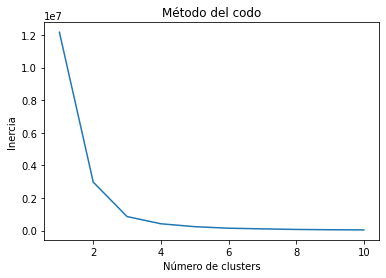

In [6]:
#Usando el método del codo para encontrar el número óptimo de grupos
valores = df[["matriculados","postulantes"]].values
metodo_codo(valores)

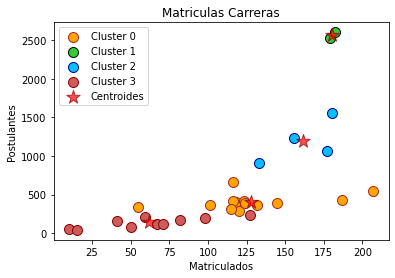

In [7]:
#Ejecuta K-means con k=4
y_means = run_kmeans(valores,4)

Del gráfico anterior se observan los 4 clusters que agrupan carreras de acuerdo a su demanda en cuanto a postulación y matricula efectiva, teniendo el siguiente resultado a interpretar

In [8]:
df["cluster"] = pd.DataFrame(y_means)
df = df.sort_values(by = ['postulantes','matriculados'], ascending = [False, False])
df

,CARRERA,matriculados,postulantes,cluster
15,MEDICINA,182,2604,1
6,ENFERMERÍA,179,2529,1
7,ENFERMERÍA (CURICO),180,1557,2
14,KINESIOLOGÍA,156,1234,2
26,PSICOLOGÍA,177,1062,2
16,NUTRICIÓN Y DIETÉTICA,133,915,2
11,INGENIERÍA COMERCIAL,116,666,0
13,INGENIERÍA EN CONSTRUCCIÓN,207,550,0
21,PEDAGOGÍA EN EDUCACIÓN FÍSICA,187,436,0
9,INGENIERIA CIVIL INDUSTRIAL,123,419,0


De acuerdo a la tabla anterior, es posible distinguir y categorizar carreras según demanda y matricula para entregar información descriptiva al dueño del proceso de admisión para un mejor conocimiento de los datos y toma de decisiones

<img src="clusters_carreras2.png" width="640px"><br>
$$\text{Imagen 17 : Categorización de Carreras} $$

$\large\textbf{4 PRE-PROCESAMIENTO DE DATOS}$

Para efectos de resumir esta etapa, se mencionarán las decisiones más importantes respecto de los datos, que finalmente quedaron como parte del dataset depurado.

- La variables <b>SEXO, PACE GRATUIDAD y ESTADO</b> son dicotómicas, por lo que se crearon variables dummies con valores 0 y 1.
- La variable <b>PACE</b> fue completada con valore "NO PACE" para los missing values y posteriormente también se transformó en variable dummy con valores 0 y 1.
- La variable <b>PUNTAJE</b> se corrigió diviendo sus valores por 100, ya que se encontraban en una escala diferente
- La variable <b>PSU_PROMLM</b> se corrigió diviendo sus valores por 10, ya que se encontraban en una escala diferente
- Las variables <b>REGION, CARRERA, GRUPO_DEPEN y FACULTAD</b> fueron codificadas en valores numéricos
- Se eliminó la variable <b>FACULTAD</b>, ya que se correlaciona fuertemente con <b>CARRERA, y CARRERA</b> tiene mejor correlación con <b>ESTADO</b>. Además, interesa más la predicción de matricula a nivel de <b>CARRERA</b>. 
- La variable <b>PUNTAJE</b> se correlaciona con <b>PTJE_NEM y PSU_PROMLM</b> por que es resultado de una combinación lineal entre ellas por lo que son redundantes y éstas últimas fueron eliminadas. <b>PUNTAJE</b> tiene una correlación con <b>ESTADO</b> por lo que se mantuvo
- La variable <b>REGION</b> está altamente correlacionada con <b>LATITUD y LONGITUD</b> ,se pensó en eliminarlas pero bajo el supuesto de que la localidad entrega información a la predicción de la matricula según el análisis de importancia de variables de los experimentos realizados en el modelado.
- En varios experimentos se observó que la <b>LATITUD</b> y la <b>LONGITUD</b> tenían importancias dispares, y bajo el supuesto de que ambas variables son importantes juntas al determinar un punto geolocalizado, se hizo la prueba de aplicar una función de $\textit{Geohashing}$ para asignar un valor único numérico que representa al par de valores, sin embargo, el resultado no mejoró las métricas y se decidió en mantener <b>LATIDUD y LONGITUD</b> separadas.
Se realizaron cambios a los nombre de las columnas del dataset para mejor comprensión :
 1. SEXO_MASCULINO -> SEXO(1:Masculino, 0:Femenino)
 2. PACE_PACE -> PACE (1: Tiene PACE, 0: No tiene PACE)
 3. GRATUIDAD_SI -> GRATUIDAD (1: Tiene Gratuidad, 0: No tiene Gratuidad)
 4. ESTADO_SI -> ESTADO (1: Matriculado , 0:No Matriculado)


$\large\textbf{5 MODELADO}$

En esta sección se utilizarán los modelos de clasificación supervisados $\textit{Decision Tree, Random Forest, XGBoost}$ basado en árboles y $\textit{XGBoost}$ basado en random forests. Posteriormente, se comparan los resultados en la obtención de la predicción de la matrícula basado en el score ${F}_{1}$, que es la que permite dar la misma importancia a la precisión y la sensibilidad en base al cálculo de su media armónica.

In [9]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import pandas as pd
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn.tree # Árboles de decisión
import sklearn.ensemble # Ensambles de modelos
import sklearn.model_selection
import sklearn.decomposition # Módulo donde encontramos el análisis de componentes principales
import xgboost as xgb 
from sklearn import datasets
from collections import Counter
from statsmodels.stats.multicomp import pairwise_tukeyhsd

$\normalsize\textbf{5.1 Definición de Funciones}$

In [10]:
##########DEFINICIÓN DE FUNCIONES #####
def calcula_metricas(nombre_algoritmo,y_test,y_pred):
### CLASE POSITIVA (1) ###
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision = precision_score(y_test, y_pred)

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score
    exactitud = accuracy_score(y_test, y_pred)

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad = recall_score(y_test, y_pred)

    #Calculo el Puntaje F1 del modelo
    from sklearn.metrics import f1_score
    puntajef1 = f1_score(y_test, y_pred)

    #Calculo la curva ROC - AUC del modelo
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, y_pred)

### CLASE NEGATIVA (0) ###
    from sklearn.metrics import confusion_matrix
    labels = [1, 0]
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    tp,fn,fp,tn = cm.ravel()
    
    #True Negative Rate / specificity
    TNR_recall_espec = round(tn/(tn+fp),6)
    
    #Negative Predictive Value
    NPV_precision = round(tn/(tn+fn),6)
   
    #Cálculo del F1 para la clase negativa
    F1_neg = round(2 * (NPV_precision * TNR_recall_espec) / (NPV_precision + TNR_recall_espec),2)
   
    ## Vector de Desempeño - Resumen de Métricas del Modelo
    df_1 = pd.DataFrame({'Modelo': [nombre_algoritmo],'Clase ':[1],'Exactitud': [exactitud],'Precisión': [precision], 
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
    df_2 = pd.DataFrame({'Modelo': '','Clase ':[0],'Exactitud': '','Precisión': [NPV_precision], 
                   'Sensibilidad': [TNR_recall_espec], 'F1': [F1_neg],'AUC': ''})
    df = df_1.append(df_2, ignore_index = True)
    
    return df

In [11]:
def matriz_confusion(y_test,y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns
    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])

    ax = sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Matriz de Confusión\n\n');
    ax.set_xlabel('\nPredicción')
    ax.set_ylabel('Real ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [12]:
def importancia_variables(algoritmo, nombre_algoritmo):
    import matplotlib.pyplot as plt
    Importance = pd.DataFrame({'Importance':algoritmo.feature_importances_*100}, 
                          index = cols)


    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'steelblue', )
    plt.suptitle('Importancia de Variables')
    plt.title(nombre_algoritmo)

    plt.gca().legend_ = None

In [13]:
#Synthetic Minority Oversampling Technique_ + Submuestro de la clase mayoritaria + Balanceo parcial del dataset
def SMOTE_RUS (X_train,y_train,sample_smote,sample_rus):
    import imblearn
    sm = imblearn.over_sampling.SMOTE(sampling_strategy=sample_smote,random_state=11) 
    rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=sample_rus,random_state=11) 
    steps = [('SMOTE', sm), ('RUS', rus)] # Ponemos ambos pasos
    sm_rus = imblearn.pipeline.Pipeline(steps=steps) # Creamos un pipeline para realizar ambas tareas
    X_train_sm_rus, y_train_sm_rus = sm_rus.fit_resample(X_train, y_train)   
    return X_train_sm_rus,y_train_sm_rus, sm_rus

In [14]:
#Dibuja los scores obtenidos como proceso de evaluación iterativo, recibe los resultados y el valor ideal
def plot_scores(scores, ideal):
    import matplotlib.pyplot as plt
    # creating the dataset
    dic_scores = dict(enumerate(scores.flatten(), 1))
    k = list(dic_scores.keys())
    valores = list(dic_scores.values())
  
    fig = plt.figure(figsize = (10, 5))
 
    # creating the xy plot
  #  plt.xlim( [ min(k), max(k) ] )          # Plot from x=0 to x=80.
  #  plt.ylim( [ min(scores), 1 ] ) 
   #Gráfico XY de los scores vs K-folds
    plt.text(max(k)/2,max(valores)+0.010,'Comportamiento del score', color='steelblue')
    plt.plot(k, valores, color ='steelblue')
    
    #Mustra línea de umbral establecida
    plt.text(max(k)/2,ideal-0.010,'Umbral de hipótesis',color='mediumblue')
    plt.plot(k,[ideal for _ in range(len(k))],color='mediumblue')
    
    #Muestra la línea promedio obtenida
    plt.text(max(k)/2,scores.mean()-0.010,'Score promedio',color='brown')
    plt.text(max(k)/2,scores.mean()-0.020, round(scores.mean(),6),color='brown')
    
    plt.plot(k,[scores.mean() for _ in range(len(k))],color='brown', linestyle='dashed')
    plt.xlabel("k-folds")
    plt.ylabel("score")
    plt.suptitle("Scores de algoritmo evaluado mediante k-fold estratificado")
    plt.title("score ideal del proyecto F1 = 0.8")
    plt.show()

In [15]:
def grid_search(estimator,param_grid,features,label):
    """
    Recibe un estimador, una matriz de hiperparámetros, una matriz de características y un arreglo de etiquetas.
    Retorna un objeto del tipo GridSearchCV
    """
    gs = sklearn.model_selection.GridSearchCV( # Instanciamos un objeto de grid search
        estimator, # Este es el estimador al cual le buscaremos los mejores hiperparámetros.
        scoring = 'f1', # Esta es la métrica de rendimiento que utilizaremos.
        param_grid = param_grid, # Acá pasamos el espacio de hiperparámetros a probar
        cv = sklearn.model_selection.StratifiedKFold( # Utilizamos una validación cruzada estratificada
                n_splits = 3, # El conjunto de datos se divide en 3
                shuffle = True # Desordenamos el conjunto de datos antes de dividirlo
            )
    )
    gs.fit(features,label) # Entrenamos el grid search
    return gs

$\normalsize\textbf{5.2 Carga de datos}$

In [16]:
#Carga de datos depurados
data = pd.read_excel("postulaciones_depurado.xlsx")
df2 = data.groupby(['ESTADO'])['ESTADO'].count()
df2

ESTADO
0    13365
1     3286
Name: ESTADO, dtype: int64

In [17]:
# Separar las variables dependientes de la independientes
y = data['ESTADO']
X = data.drop(['ESTADO','PERIODO','IDPOS','PACE'], axis = 1)

#Captura los nombres de las variables independientes
cols = X.columns

#Cuenta la cantidad de registros por cada clase
Counter(y)

Counter({0: 13365, 1: 3286})

$\normalsize\textbf{5.3 Escalamientos de datos}$

In [18]:
#Se escalan todos los datos normalizando con valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
X = escalar.fit_transform(X)

$\normalsize\textbf{5.4 Separación de datos Train/Test}$

In [19]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11, stratify = y)

In [20]:
#Cuenta la cantidad de registros por cada clase del set de entrenamiento
Counter(y_train)

Counter({0: 10691, 1: 2629})

$\normalsize\textbf{5.4 Balanceo de clases}$

En esta sección se realiza el balanceo de clases usando técnica mixta con mejores resultados, SMOTE y Random Under Sampling . Lo anterior se justifica, ya que en el dataset existe un desbalanceo en una razón aproximada de $\frac{1}{4}$ entre la clase minoritaria (1 : Si Matrícula) y la clase mayoritaria (0 : No Matrícula)

Después de varios experimentos, no todos documentados en este informe, se logró determinar un porcentaje de Oversampling de 28% y Undersampling de 30% para obtener los mejore resultados del score elegido.

In [21]:
#SMOTE + RUS
X_train, y_train, pipeline = SMOTE_RUS(X_train,y_train,0.28,0.3)

#Cuenta la cantidad de registros del set de entrenamiento post balanceo
Counter(y_train)

Counter({0: 9976, 1: 2993})

$\normalsize\textbf{5.5 Arboles de Decisión}$

En esta sección se aplicará el entrenamiento y evaluación modelo DecisionTreeClassifier para la predicción de la matrícula

$\textbf{5.5.1 Optimización de hiperparámetros}$

In [22]:
"""
tree = sklearn.tree.DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],  
              'max_depth': np.arange(3, 15)
             }
tree_gs = grid_search(
    estimator = tree,
    param_grid = param_grid,
    features = X,
    label = y
)
tree_gs.best_params_
"""

"\ntree = sklearn.tree.DecisionTreeClassifier()\n\nparam_grid = {'criterion':['gini','entropy'],  \n              'max_depth': np.arange(3, 15)\n             }\ntree_gs = grid_search(\n    estimator = tree,\n    param_grid = param_grid,\n    features = X,\n    label = y\n)\ntree_gs.best_params_\n"

Dados los resultados anteriores se usará el algoritmo con los mejores hiperparámetros

$\textbf{5.5.2 Evaluación del modelo Decision Tree Classifier}$

In [23]:
# Instanciar el clasificador basado en Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=9,criterion = 'entropy')

In [24]:
#Entreno el modelo
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [25]:
#Realizo una predicción
y_pred = tree_clf.predict(X_test)

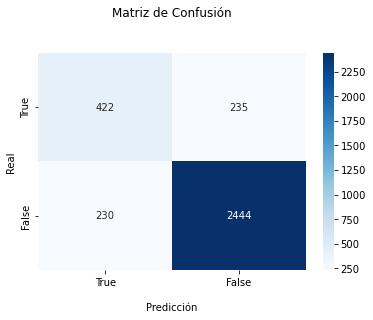

In [26]:
#Calcula y despliega la matriz de confusión
matriz_confusion(y_test,y_pred)

In [27]:
#Obtiene las métricas del modelo
df_metricas_tree = calcula_metricas('Tree',y_test,y_pred)
df_metricas_tree.style.hide_index()

Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
Tree,1,0.860402,0.647239,0.642314,0.644767,0.778150
,0,,0.912281,0.913987,0.910000,


Con las siguientes variables se obtuvo el mejor resultado de ${F}_{1}$, en experimento no documentados en este informe, se fueron quitando variables con menor importancia hasta mantener las que mejor score logró.

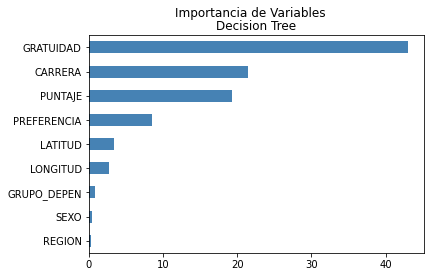

In [28]:
#Calcula y despliega la importancia de las variables
importancia_variables(tree_clf, "Decision Tree")

A continuación se aplicación de $\textit{K-Folds Stratified}$ para evaluar la estabilidad del rendimiento del modelo frente a multiples sets de entrenamiento

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluar el pipeline de balanceo y el algoritmo con K-Fold estratificado
#para determinar el rendimiento que sea independiente del set de entrenamiento
pipeline.steps.append(['tree',tree_clf])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tree_scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = round(tree_scores.mean(),6)
print('F1 promedio: %.3f' % score)

F1 promedio: 0.658


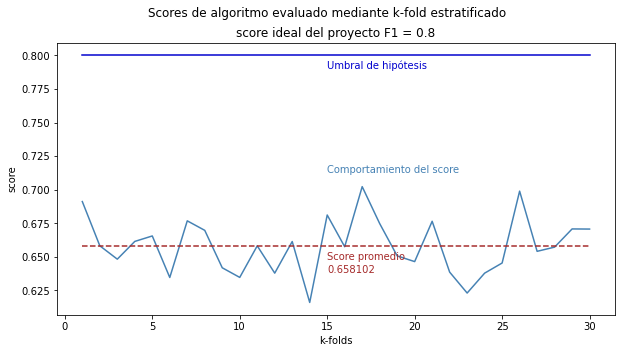

In [30]:
#Dibuja los scores obtenidos como proceso de evaluación iterativo, recibe los resultados y el valor ideal
plot_scores(tree_scores, 0.8)

Viendo los resultados anteriores se observa que el algoritmo tiene un rendimiento estable frente a los conjuntos de entrenamiento y existe bajo riesgo de overfitting

$\normalsize\textbf{5.6 Random Forests}$

En esta sección se aplicará el entrenamiento y evaluación modelo RandomForestClassifier para la predicción de la matrícula

$\textbf{5.6.1 Optimización de hiperparámetros}$

In [31]:
"""
#Realiza la sensibilización de los parámetros

rf = sklearn.ensemble.RandomForestClassifier()

rf_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 8, 16],
    'min_samples_split': range(2,5),
    'bootstrap':[True,False]
}

rf_gs = grid_search(
    estimator = rf,
    param_grid = rf_grid,
    features = X,
    label = y
)
rf_gs.best_params_
"""

"\n#Realiza la sensibilización de los parámetros\n\nrf = sklearn.ensemble.RandomForestClassifier()\n\nrf_grid = {\n    'n_estimators': [50, 100, 200, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth': [2, 8, 16],\n    'min_samples_split': range(2,5),\n    'bootstrap':[True,False]\n}\n\nrf_gs = grid_search(\n    estimator = rf,\n    param_grid = rf_grid,\n    features = X,\n    label = y\n)\nrf_gs.best_params_\n"

Dados los resultados anteriores se usará el algoritmo con los mejores hiperparámetros

$\textbf{5.6.2 Evaluación del modelo Random Forests Classifier}$

In [32]:
# Instanciar Random Forests
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(bootstrap=True,max_depth=16,max_features='auto', min_samples_split=4,n_estimators = 200)

In [33]:
#Entreno el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=4, n_estimators=200)

In [34]:
#Realizo una predicción
y_pred = rf_clf.predict(X_test)

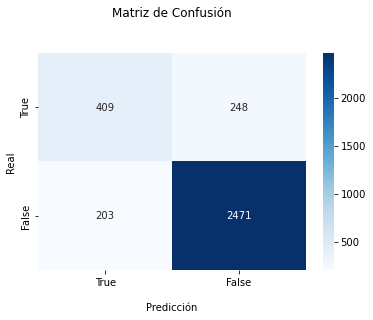

In [35]:
#Calcula y despliega la matriz de confusión
matriz_confusion(y_test,y_pred)

In [36]:
#Obtiene las métricas del modelo
df_metricas_rf = calcula_metricas('Random Forests',y_test,y_pred)
df_metricas_rf.style.hide_index()

Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
Random Forests,1,0.864605,0.668301,0.622527,0.644602,0.773305
,0,,0.908790,0.924084,0.920000,


Con las siguientes variables se obtuvo el mejor resultado de ${F}_{1}$, en experimento no documentados en este informe, se fueron quitando variables con menor importancia hasta mantener las que mejor ${F}_{1}$ se logró

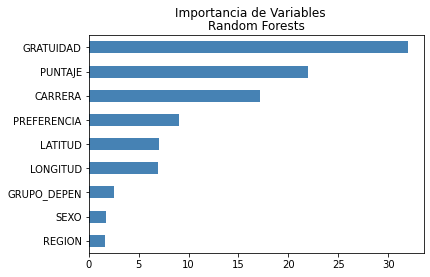

In [37]:
#Calcula y despliega la importancia de las variables
importancia_variables(rf_clf, "Random Forests")

A continuación se aplicación de $\textit{K-Folds Stratified}$ para evaluar la estabilidad del rendimiento del modelo frente a multiples sets de entrenamiento

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluar el pipeline de balanceo y el algoritmo con K-Fold estratificado
#para determinar el rendimiento que sea independiente del set de entrenamiento
#Elimina del pipeline el arbol de decisión
pipeline.steps.pop(2)

#Agrega al pipeline random forests
pipeline.steps.append(['rf',rf_clf])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = round(rf_scores.mean(),6)
print('F1 promedio: %.3f' % score)

F1 promedio: 0.662


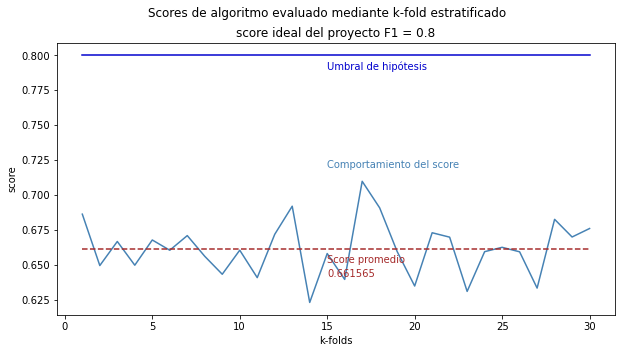

In [39]:
#Dibuja los scores obtenidos como proceso de evaluación iterativo, recibe los resultados y el valor ideal
plot_scores(rf_scores, 0.8)

Viendo los resultados anteriores se observa que el algoritmo tiene un rendimiento estable frente a los conjuntos de entrenamiento y existe bajo riesgo de overfitting

$\normalsize\textbf{5.7 XGBoost Classifier basado en árboles}$

En esta sección se aplicará el entrenamiento y evaluación modelo $\textit{XGBoostClassifier}$ basado en el $\textit{booster gbtree}$ para la predicción de la matrícula

$\textbf{5.7.1 Optimización de hiperparámetros}$

In [40]:
"""
#Realiza la sensibilización de los hiperparámetros

xgb_cl = xgb.XGBClassifier(objective='binary:logistic',disable_default_eval_metric=True, tree_method='gpu_hist')

xgb_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [6, 7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2], 
              'learning_rate': [0.1, 0.01, 0.05]
            
             }

xgb_gs = grid_search(
    estimator = xgb_cl,
    param_grid = xgb_grid,
    features = X,
    label = y
)
xgb_gs.best_params_
"""

"\n#Realiza la sensibilización de los hiperparámetros\n\nxgb_cl = xgb.XGBClassifier(objective='binary:logistic',disable_default_eval_metric=True, tree_method='gpu_hist')\n\nxgb_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  \n              'max_depth': [6, 7, 8],\n              'reg_lambda' :[0.26, 0.25, 0.2], \n              'learning_rate': [0.1, 0.01, 0.05]\n            \n             }\n\nxgb_gs = grid_search(\n    estimator = xgb_cl,\n    param_grid = xgb_grid,\n    features = X,\n    label = y\n)\nxgb_gs.best_params_\n"

Dados los resultados anteriores se usará el algoritmo con los mejores hiperparámetros

$\textbf{5.7.2 Evaluación del modelo XGBoost Classifier}$

In [41]:
# Instanciar XGBoost
xgb_clf = xgb.XGBClassifier(max_depth=8, n_estimators = 80, reg_lambda=0.2, 
                            objective='binary:logistic',
                            disable_default_eval_metric=True,
                            learning_rate = 0.01,
                            tree_method='gpu_hist')

In [42]:
#Entreno el modelo
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=True, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.2, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [43]:
#Realizo una predicción
y_pred = xgb_clf.predict(X_test)

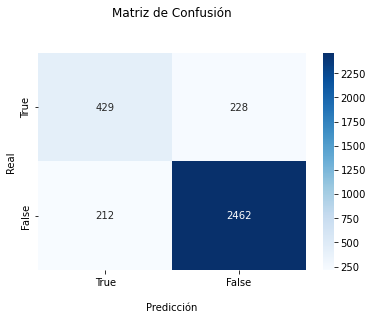

In [44]:
#Calcula y despliega la matriz de confusión
matriz_confusion(y_test,y_pred)

In [45]:
#Obtiene las métricas del modelo
df_metricas_xgb = calcula_metricas('XGBClassifier',y_test,y_pred)
df_metricas_xgb.style.hide_index()

Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
XGBClassifier,1,0.867908,0.669267,0.652968,0.661017,0.786843
,0,,0.915242,0.920718,0.920000,


Con las siguientes variables se obtuvo el mejor resultado de ${F}_{1}$, en experimento no documentados en este informe, se fueron quitando variables con menor importancia hasta mantener las que mejor ${F}_{1}$ se logró. En este caso , se observa que la GRATUIDAD es muy determinante , más que otras variables que entrega menos información al modelo.

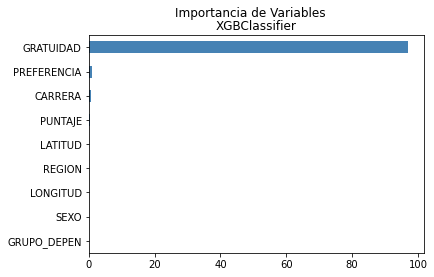

In [46]:
#Calcula y despliega la importancia de las variables
importancia_variables(xgb_clf, "XGBClassifier")

A continuación se aplicación de $\textit{K-Folds Stratified}$ para evaluar la estabilidad del rendimiento del modelo frente a multiples sets de entrenamiento

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluar el pipeline de balanceo y el algoritmo con K-Fold estratificado
#para determinar el rendimiento que sea independiente del set de entrenamiento

#Elimina del pipeline el Random Forests
pipeline.steps.pop(2)

#Agrega al pipeline XGBoost
pipeline.steps.append(['xgb',xgb_clf])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
xgb_scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = round(xgb_scores.mean(),6)
print('F1 promedio: %.3f' % score)

F1 promedio: 0.678


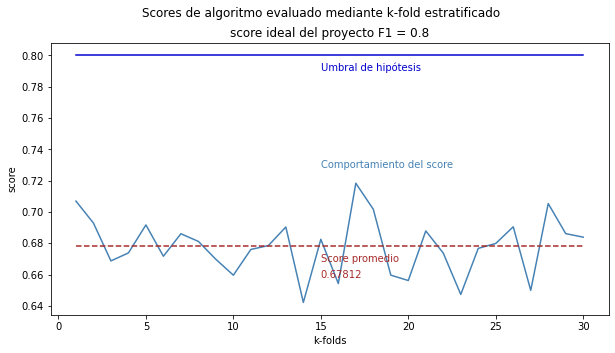

In [48]:
#Dibuja los scores obtenidos como proceso de evaluación iterativo, recibe los resultados y el valor ideal
plot_scores(xgb_scores, 0.8)

$\normalsize\textbf{5.8 XGBoost Classifier basado en Random Forests}$

En esta sección se aplicará el entrenamiento y evaluación modelo $\textit{XGBRFClassifier}$ basado en el $\textit{random forests}$ para la predicción de la matrícula

$\textbf{5.8.1 Optimización de hiperparámetros}$

In [49]:
"""
#Realiza la sensibilización de los hiperparámetros

xgbrf_cl = xgb.XGBRFClassifier(objective='binary:logistic',disable_default_eval_metric=True, tree_method='gpu_hist')

xgbrf_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [6, 7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2], 
              'learning_rate': [0.1, 0.01, 0.05]
            
             }

xgbrf_gs = grid_search(
    estimator = xgbrf_cl,
    param_grid = xgbrf_grid,
    features = X,
    label = y
)
xgbrf_gs.best_params_
"""

"\n#Realiza la sensibilización de los hiperparámetros\n\nxgbrf_cl = xgb.XGBRFClassifier(objective='binary:logistic',disable_default_eval_metric=True, tree_method='gpu_hist')\n\nxgbrf_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  \n              'max_depth': [6, 7, 8],\n              'reg_lambda' :[0.26, 0.25, 0.2], \n              'learning_rate': [0.1, 0.01, 0.05]\n            \n             }\n\nxgbrf_gs = grid_search(\n    estimator = xgbrf_cl,\n    param_grid = xgbrf_grid,\n    features = X,\n    label = y\n)\nxgbrf_gs.best_params_\n"

Dados los resultados anteriores se usará el algoritmo con los mejores hiperparámetros

$\textbf{5.8.2 Evaluación del modelo XGBRFBoost Classifier}$

In [50]:
# Instanciar XGBRFClassifier
xgbrf_clf = xgb.XGBRFClassifier(max_depth=8, n_estimators = 80, reg_lambda=0.2, 
                            objective='binary:logistic',
                            disable_default_eval_metric=True,
                            learning_rate = 0.1,
                            tree_method='gpu_hist')

In [51]:
#Entreno el modelo
xgbrf_clf.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, disable_default_eval_metric=True, gamma=0,
                gpu_id=0, importance_type='gain', interaction_constraints='',
                learning_rate=0.1, max_delta_step=0, max_depth=8,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=80, n_jobs=12, num_parallel_tree=80,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=0.2, scale_pos_weight=1, tree_method='gpu_hist',
                validate_parameters=1, verbosity=None)

In [52]:
#Realizo una predicción
y_pred = xgbrf_clf.predict(X_test)

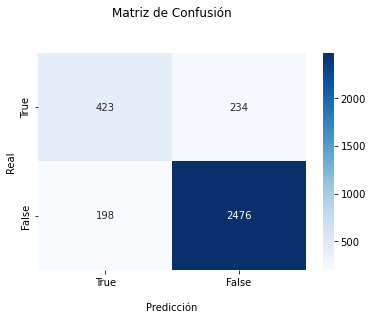

In [53]:
#Calcula y despliega la matriz de confusión
matriz_confusion(y_test,y_pred)

In [54]:
#Obtiene las métricas del modelo
df_metricas_xgbrf = calcula_metricas('XGBRFClassifier',y_test,y_pred)
df_metricas_xgbrf.style.hide_index()

Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
XGBRFClassifier,1,0.870309,0.681159,0.643836,0.661972,0.784895
,0,,0.913653,0.925954,0.920000,


Con las siguientes variables se obtuvo el mejor resultado de ${F}_{1}$, en experimento no documentados en este informe, se fueron quitando variables con menor importancia hasta mantener las que mejor ${F}_{1}$ se logró. En este caso , se observa que la GRATUIDAD es muy determinante , más que otras variables que entrega menos información al modelo.

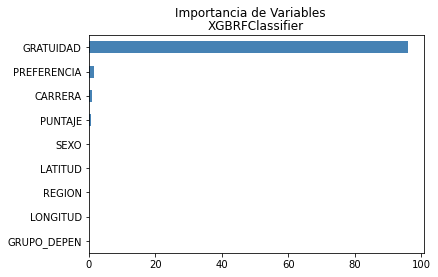

In [55]:
#Calcula y despliega la importancia de las variables
importancia_variables(xgbrf_clf, "XGBRFClassifier")

A continuación se aplicación de $\textit{K-Folds Stratified}$ para evaluar la estabilidad del rendimiento del modelo frente a multiples sets de entrenamiento

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluar el pipeline de balanceo y el algoritmo con K-Fold estratificado
#para determinar el rendimiento que sea independiente del set de entrenamiento

#Elimina del pipeline el XGBoost
pipeline.steps.pop(2)

#Agrega al pipeline XGBoost RF
pipeline.steps.append(['xgbrf',xgbrf_clf])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbrf_scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = round(xgbrf_scores.mean(),6)
print('F1 promedio: %.3f' % score)

F1 promedio: 0.672


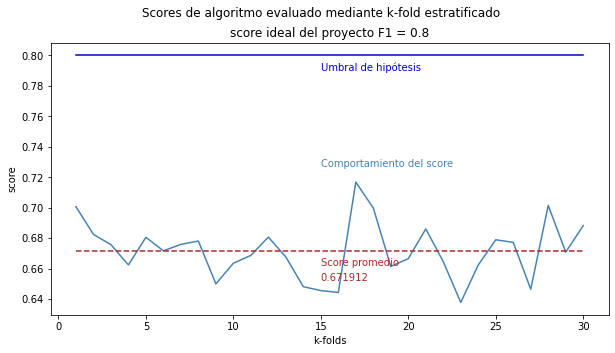

In [57]:
#Dibuja los scores obtenidos como proceso de evaluación iterativo, recibe los resultados y el valor ideal
plot_scores(xgbrf_scores, 0.8)

$\large\textbf{6 EVALUACIÓN}$<br><br>
En esta sección se desarrolla la evaluación de resultados obtenidos para la obtención de las conclusiones finales. El primer análisis evalutativo se realizó a través de la tabla consolidada de métricas tras realizar los experimentos desplegados en este informe, con el conjunto de datos de entrenamiento y test elegido con la técnica de split, train, test con un ${20\%}$ de datos para las prueba.

$\textbf{6.1 Evaluación a priori}$

In [58]:
#Consolida todas métricas en un sólo dataframe

df_metricas_consolidadas = df_metricas_tree.append([df_metricas_rf, df_metricas_xgb,df_metricas_xgbrf],
                                                   ignore_index = True)
df_metricas_consolidadas.style.hide_index()

Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
Tree,1,0.860402,0.647239,0.642314,0.644767,0.778150
,0,,0.912281,0.913987,0.910000,
Random Forests,1,0.864605,0.668301,0.622527,0.644602,0.773305
,0,,0.908790,0.924084,0.920000,
XGBClassifier,1,0.867908,0.669267,0.652968,0.661017,0.786843
,0,,0.915242,0.920718,0.920000,
XGBRFClassifier,1,0.870309,0.681159,0.643836,0.661972,0.784895
,0,,0.913653,0.925954,0.920000,


De la tabla anterior, se desprende que los algoritmos utilizados para predecir la matricula, tienen un rendimiento muy similar con el dataset trabajado en este proyecto, y en la métrica que interesa para evaluar la hipótesis ($\textbf{F}_{1}$), es superior el algoritmo $\textit{XGBoost}$ basado en $\textit{Random Forests}$, por lo que sería un candidato a elegir, sin embargo, no alcanza el umbral de la hipótesis para la clase positiva que predice la matricula, pero si el $\textbf{F}_{1}$ para la clase negativa alcanza el ${92\%}$, por lo que es muy bueno haciendo la predicción cuando algun postulante no se matriculará.<br><br>
Para complementar el análisis anterior, se utilizarán los resultados obtenidos del proceso de validación cruzada, con lo que fue posible realizar una serie de particiones del conjunto de datos, para así obtener un rendimiento promedio de cada método al utilizar distintos conjuntos de entrenamiento y prueba. Esto también nos permite aplicar pruebas estadísticas a nuestras métricas y así poder seleccionar el mejor modelo con mayor certeza. 

In [59]:
# Guardamos todos los resultados obtenido en los procesos de Cross Validation en una lista
scores = [tree_scores,rf_scores,xgb_scores,xgbrf_scores]

#Nombres de los algoritmos utilizados
modelos = ["Decision Tree","Random Forests","XGBoost","XGRFBoost"]

Con esta visualización podemos ver la distribución de resultados para cada uno de los algoritmos seleccionados.

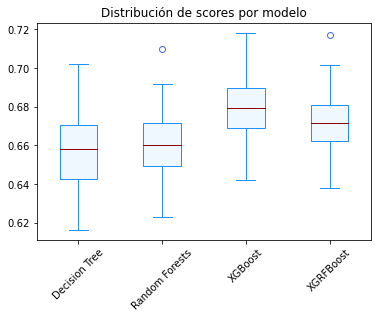

In [60]:
#Generar un diagrama de caja para ver la distribución de datos por cada predictor de matriculas. 
#Usando boxplot, podemos detectar fácilmente las diferencias entre diferentes predictores de matriculas
plt.title("Distribución de scores por modelo")
plt.boxplot(scores,labels = modelos,patch_artist=True,
           boxprops=dict(facecolor="aliceblue",color ="dodgerblue"),
           whiskerprops=dict(color ="dodgerblue"),
           medianprops = dict(color ="darkred"),
           flierprops=dict(markeredgecolor ="royalblue"),
           capprops = dict(color ="dodgerblue"))

plt.xticks(rotation=45)
plt.show()

Extraemos el resultado promedio de cada uno de los algoritmos. Al parecer, todos los algoritmos tienen un buen comportamiento respecto de la varianza de los resultados y su distribución respecto de la media. En el caso de $\textit{XGBoost}$ basado en árboles se observa en promedio con el mejor rendimiento

In [61]:
dict_score_means = dict(
    zip(
        modelos,
        map(
            np.mean,
            scores
        )
    )
)
df_score_means = pd.DataFrame.from_dict(dict_score_means,orient = 'index',  columns = ['Score mean'])
df_score_means.style.highlight_max(color = 'powderblue', axis = 0)

,Score mean
Decision Tree,0.658102
Random Forests,0.661565
XGBoost,0.678120
XGRFBoost,0.671912


$\textbf{6.2 Evaluación estadística (ANOVA)}$

Basado en los resultados anteriores, se requiere saber cuál es el mejor algoritmo. Estadísticamente se puede plantear que la hipótesis nula es que las medias de los scores de todos los algoritmos son iguales. Rechazar la hipótesis nula significaría que existe una diferencia significativa entre los algoritmos.

$\normalsize\mathbf{H}_{0}$ Hipótesis Nula $ : \large\mathbf{\mu}_{tree}$ = $\large\mathbf{\mu}_{rf}$ = $\large\mathbf{\mu}_{xgboost}$ = $\large\mathbf{\mu}_{xgrfboost}$
  
$\normalsize\mathbf{H}_{1}$ Hipótesis Alternativa $ : \large\mathbf{\mu}_{tree}$ $\neq$ $\large\mathbf{\mu}_{rf}$ $\neq$ $\large\mathbf{\mu}_{xgboost}$ $\neq$ $\large\mathbf{\mu}_{xgrfboost}$



La decisión de rechazar la hipótesis nula y aceptar la hipótesis alternativa se basa en el nivel de significación de la prueba ($\large\mathbf{\alpha}$) y la probabilidad de observar el efecto dado que la hipótesis nula es verdadera (p-value) . Si $\normalsize\mathit{p}$ $\leq$ $\large\mathbf{\alpha}$, se descarta la hipótesis nula. Por lo general, se usa un valor de $\large\mathbf{\alpha}$ = 0.05, que corresponde al 95 % de confianza.
Para verificar si la diferencia entre las medias de los resultados es estadísticamente significativa utilizamos una prueba de $\textbf{ANOVA}$.

In [62]:
# stats f_oneway functions toma los scores como entrada y devuelve el valor ANOVA F y p
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(*scores)
print(fvalue, pvalue)

6.73247280668084 0.00031555797801049117


$\textbf{Interpretación}$

El valor de $\normalsize\mathit{p}$ obtenido del análisis $\textbf{ANOVA}$ es significativo ($\normalsize\mathit{p =}$ $\mathit{0.0000794411}$ < $\mathit{0.05}$), se rechaza la hipótesis nula, por lo que concluimos que existen diferencias significativas entre los predictores de matriculas, es decir, no todos los modelos tienen el mismo rendimiento. El valor $\mathit{F}$ está inversamente relacionado con el valor $\normalsize\mathit{p}$ , es decir, un valor de $\mathit{F}$ más alto indica un valor $\normalsize\mathit{p}$ significativo.

$\textbf{6.3 Evaluación estadística test de Tukey}$

Del análisis de  $\textbf{ANOVA}$, sabemos que las diferencias de las medias de los modelos son estadísticamente significativas, pero  $\textbf{ANOVA}$ no indica cuales son los modelos mejores entre ellos. Para conocer los pares de modelos diferentes significativos, realizaremos un análisis de comparación por pares múltiples (comparación post hoc), para todas las comparaciones no planificadas utilizando la prueba de diferencias significativas honestas ( $\textbf{HSD}$) de  $\textbf{Tukey}$.

In [63]:
# Se ejecuta el test de Tukey
score_all = pd.DataFrame(np.ravel(np.array(scores)), columns=['score'])
group_all = pd.DataFrame(np.repeat(modelos,repeats=30),columns=['group'])

tukey = pairwise_tukeyhsd(endog=score_all['score'],
                          groups=group_all['group'],
                          alpha=0.05)

#Desplegar tabla de resultados
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 Decision Tree Random Forests   0.0035  0.899 -0.0097 0.0166  False
 Decision Tree        XGBoost     0.02  0.001  0.0069 0.0331   True
 Decision Tree      XGRFBoost   0.0138  0.035  0.0007 0.0269   True
Random Forests        XGBoost   0.0166 0.0072  0.0034 0.0297   True
Random Forests      XGRFBoost   0.0103 0.1741 -0.0028 0.0235  False
       XGBoost      XGRFBoost  -0.0062 0.5944 -0.0193 0.0069  False
-------------------------------------------------------------------


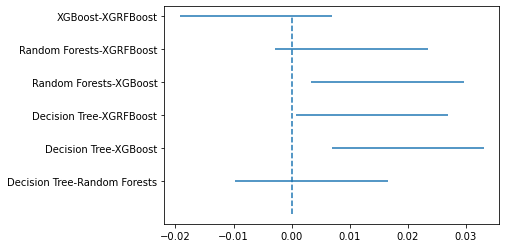

In [64]:
#Grafica los intervalos de confianza
import matplotlib.pyplot as plt
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

Los resultados anteriores revelan, que el modelo $\textit{Decision Tree}$ difiere significativamente de $\textit{XGBoost}$ y de $\textit{XGRFBoost}$, y a su vez, el algoritmo $\textit{Random Forests}$ difiere significativamente de $\textit{XGBoost}$. La  columna $\textit{reject}$ de la tabla nos dice que existe evidencia significativa para rechazar la hipótesis nula para los grupos con esos casos ($\normalsize\mathit{p}$ $\leq$ $\small{0.05}$).

La tabla del test de Tukey también muestra la diferencia entre las medias de los algoritmos. En el caso de los modelos en que no se rechaza la hipótesis nula se tiene que :

$\large\mathbf{\mu}_{tree}$ - $\large\mathbf{\mu}_{rf}$ = $\small{0.0013}$<br>
$\large\mathbf{\mu}_{rf}$ - $\large\mathbf{\mu}_{xgrfboost}$ = $\small{0.0129}$<BR>
$\large\mathbf{\mu}_{xgboost}$ - $\large\mathbf{\mu}_{xgrfboost}$ = $\small{-0.0062}$

Para complementar, en el gráfico anterior, se observan los intervalos de confianza que cruzan la línea discontinua vertical $\large\mathit{x}$ = 0 en son aquellos en los que las medias entre esos grupos pueden ser iguales, como se observa en las ecuaciones anteriores. Los otros intervalos tienen diferencias de medias cuyos intervalos de confianza del 95% no incluyen el cero.

Esto lleva a la conclusión de que $\textit{XGRFBoost}$ es el mejor algoritmo para predecir las matrículas del grupo.

$\textbf{6.3 Evaluación estadística test de Bonferroni}$

Dado el resultado anterior, para determinar qué algoritmo puede ser el mejor estadísticamente, se analizará el conjunto específico de comparaciones de medias, en este sentido , la prueba post-hoc de $\textit{Bonferroni}$ produce los intervalos de confianza más estrechos, lo que significa que tiene la mayor capacidad para detectar diferencias reales entre los grupos de interés. Lo que se busca es controlar la probabilidad de cometer un error tipo I en $\large\mathbf{\alpha}$ = $\normalsize{0.05}$, calculando un nuevo valor 

$\large\mathbf{\alpha}_{new}$ = $\Large\frac{{\alpha}}{n}$, donde $\normalsize\mathbf{\alpha}$ es el valor usado en el test de Tukey y $\normalsize\mathbf{n}$ es el número de grupos generados en el mismo test. Por lo tanto, $\large\mathbf{\alpha}_{new}$ = $\large\frac{{0.05}}{6}$ = $\small{0.0083}$ 


Si tomamos como referencia el valor de $\normalsize\mathit{p}$ obtenido en el test de Tukey, se concluye que sólo los pares de algoritmos $\textit{Tree - Random Forest}$ y $\textit{XGBoost - XGRFBoost}$ tienen un valor inferior a 0.0083, por lo que los algoritmos que tienen una diferencia estadísticamente significativa son $\textit{Tree y Random Forest}$, $\textit{XGBoost y XGRFBoost}$, y analizando la diferencia de medias $\textit{Decision Tree}$ es el mejor algoritmo.

$\large\textbf{7 CONCLUSIONES}$<br><br>

Los directivos del Área de Admisión de $\textbf{Universia}$ están interesados en tener un predictor de mátricula efectiva confiable, con pocos errores de falsas matrículas y falsas no matrículas. Por lo anterior, plantearon un objetivo de proyecto que en un comienzo no parecía ser tan exigente, pero sí lo es, ya que lograr un resultado sobre el $80\%$ de precisión y sensibilidad de manera equilibrada es un gran desafío. Quedó demostrado que con el conjunto de datos depurado a un muy buen nivel de calidad, considerando importancia de variables, optimización de hiperparámetros, y habiendo utilizado tres algoritmos de aprendizaje automático de clasificación de alto rendimiento en el estado del arte, no se logrío alzancar el objetivo planteado en la hipótesis.

De los tres algorimos seleccionados, se realizaron experimentos con cuatro grupos de predictores : $\textit{Desicion Tree, Random Forests, XGBoost}$ basado en arboles de decisión y $\textit{XGBoost}$ basado en random forests. De este grupo, se demostró estadísticamente con validación cruzada estratificada que $\textit{Decision Tree}$ es el mejor de ellos, aunque no por mucha diferencia en cuanto a las métricas. A continuación se resume lo que se concluye al analizar las métricas del mejor algoritmo de esta experiencia. Cabe señalar que el score de evaluación de los modelos fue la métrica $\textit{F}_{1}$, la cual considera la presición y el recall tal como exije el negocio, por lo tanto el desafio se orientó a tener un $\textit{F}_{1}$ sobre el $80\%$ para la clase positiva (matrícula).

- La precisión obtenida indica que aproximadamente el $65\%$ de los postulantes que se pronostican como candidatos a matricularse, estarán realmente interesados en hacerlo efectivamente.

- La sensibilidad obtenida indica que el modelo es capaz de identificar un $64\%$ de los postulantes que están realmente interesados en matricularse.

- La métrica $\textit{F}_{1}$, asume que nos importa de igual forma la precisión y la exhaustividad teniendo una media armónica entre ambas de un $65\%$.

- La exactitud promedio de predicción del modelo es de un $86\%$, lo cual es bueno, pero se debe considerar que ésta métrica puede ser engañosa por la naturaleza desbalanceada de los datos , en una razón $\frac{1}{4}$ para matriculados versus no matriculados. A pesar de haber realizado varios experimentos con balanceo combinado de clases (undersampling y oversampling juntos fueron mejor), las métricas que nos importaban no mejoraron.

- La métrica AUC ($\textit{Area Under Curve}$) nos dice que el modelo, en promedio, es capaz de discriminar correctamente la clase matricula y no matricula el $77\%$ de las veces, es decir el $23\%$ de las veces se equivoca. 

Como reflexión final, es importante recalcar como hallazgo, que todos los modelos en competencia tuvieron excelentes resultados para la predicción de la clase negativa (0 : no matrícula), por sobre un $91\%$ en todas las métricas. Sin embargo, el desafío futuro es obtener ese nivel de rendimiento en la clase positiva, presumiblemente con un conjunto de datos más nutrido en cuanto a historial de postulaciones. En el intertanto, como siguiente etapa del proyecto actual, se podría proponer al negocio una marcha blanca para predecir las matrículas, pero sólo tomando en cuenta aquellas predicciones de la clase positiva (1 : si matricula) con la probabilidad de predicción sobre el $90\%$ dentro de la restricción de confiabilidad que actualmente nos entrega.